In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from collections import defaultdict

dataset = [
    *np.load("mistral-split-vecs.pickle.npy", allow_pickle=True),
    *np.load("mistral4-split-vecs.pickle.npy", allow_pickle=True),
]

genre_vecs = defaultdict(list)

for text_obj in tqdm(dataset):
    for split_text in text_obj["split_text"]:
        genre = split_text["genre"]
        vec = split_text["vec"]
        genre_vecs[genre].append(vec)

FileNotFoundError: [Errno 2] No such file or directory: 'mistral-split-vecs.pickle.npy'

In [32]:
vecs = []
for i in range(13):
    # vecs.append( np.load(f"/home/ubuntu/eloise/vectorLayer{i}.npy") )
    vecs.append( np.load(f"/home/ubuntu/eloise/randomVectorLayer{i}.npy") )
vecs = np.array(vecs).reshape(-1, 288)
for i in range(len(vecs)):
    vecs[i] = vecs[i] / np.linalg.norm(vecs[i])
print(vecs.shape, vecs)

import phate

# Step 3: Initialize and fit-transform with PHATE
phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(vecs)

(65, 288) [[-0.05290647  0.08130613  0.00033751 ...  0.01801877  0.09478295
   0.08580551]
 [-0.00892633 -0.11805424 -0.08094344 ... -0.10860115 -0.15218113
   0.04310731]
 [-0.02630679 -0.04628491 -0.04190903 ... -0.09841622 -0.01589546
  -0.06280863]
 ...
 [ 0.03755866  0.08721198  0.03980247 ...  0.08643252 -0.00810241
   0.01741132]
 [-0.01133364  0.03746818 -0.05844012 ...  0.05726793 -0.01748428
   0.04179157]
 [-0.04790782 -0.11786381 -0.04385679 ... -0.06578984  0.04452778
  -0.07826141]]
Calculating PHATE...
  Running PHATE on 65 observations and 288 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.02 seconds.
  Calculating optimal t...
    Automatically selected t = 13
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.01 seconds.
Calculated PHATE in 0.06 seconds.


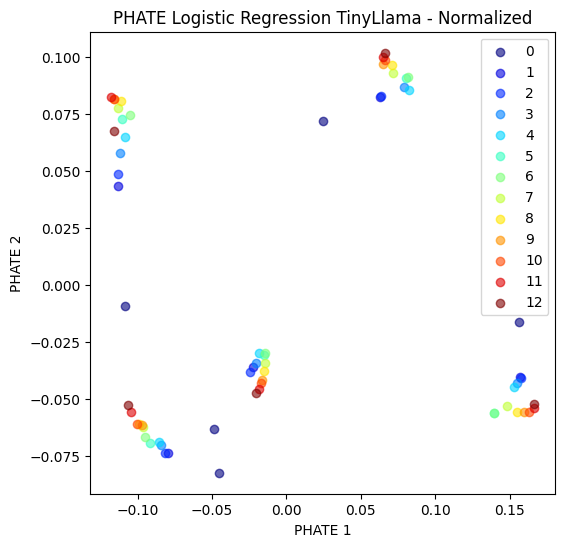

In [33]:
plt.figure(figsize=(6,6))
# Step 4: Plotting the PHATE result with genres in different colors

NUM_LABELS = 5

unique_labels = list(range(NUM_LABELS))

colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))
color_map = dict(zip(unique_labels, colors))

for label in range(NUM_LABELS):
    idx = [i for i, l in enumerate(vecs) if i % 5 == label]
    plt.scatter(data_phate[idx, 0], data_phate[idx, 1], c=[color_map[label]], label=label, alpha=0.6)

plt.title("PHATE Logistic Regression TinyLlama - Normalized")
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.legend()
plt.show()

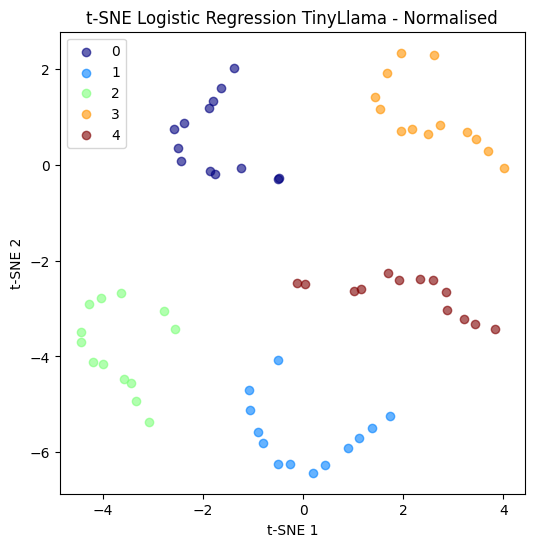

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data to 2D
data_tsne = tsne.fit_transform(vecs)

plt.figure(figsize=(6,6))
# Fit and transform the data to 2D
for label in range(5):
    idx = [i for i, l in enumerate(vecs) if i % 5 == label]
    plt.scatter(data_tsne[idx, 0], data_tsne[idx, 1], c=[color_map[label]], label=label, alpha=0.6)

# Plotting the t-SNE result
plt.title('t-SNE Logistic Regression TinyLlama - Normalised')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

In [30]:
import phate

genre_list = set(["code", "title", "explanatory", "dialogue", "instructional", "list", "narrative"])

# Step 1: Combine all vectors into a single dataset and create a labels list
data = []
labels = []
for genre, vecs in genre_vecs.items():
    if genre not in genre_list:
        continue
    data.extend(vecs)
    labels.extend([genre] * len(vecs))

data = np.array(data)  # Convert list of vectors into a numpy array for PHATE

# Step 2: Assign unique colors to each genre
unique_labels = list(set(labels))
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))
color_map = dict(zip(unique_labels, colors))

# Step 3: Initialize and fit-transform with PHATE
phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(data)

Calculating PHATE...
  Running PHATE on 2933 observations and 1024 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...


    Calculated PCA in 1.39 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.61 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 3.04 seconds.
  Calculating landmark operator...
    Calculating SVD...


/home/ubuntu/taker/.venv/lib/python3.9/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 17 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated SVD in 1.28 seconds.
    Calculating KMeans...
    Calculated KMeans in 9.41 seconds.
  Calculated landmark operator in 11.71 seconds.
  Calculating optimal t...
    Automatically selected t = 38
  Calculated optimal t in 9.04 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.73 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 6.98 seconds.
Calculated PHATE in 33.52 seconds.


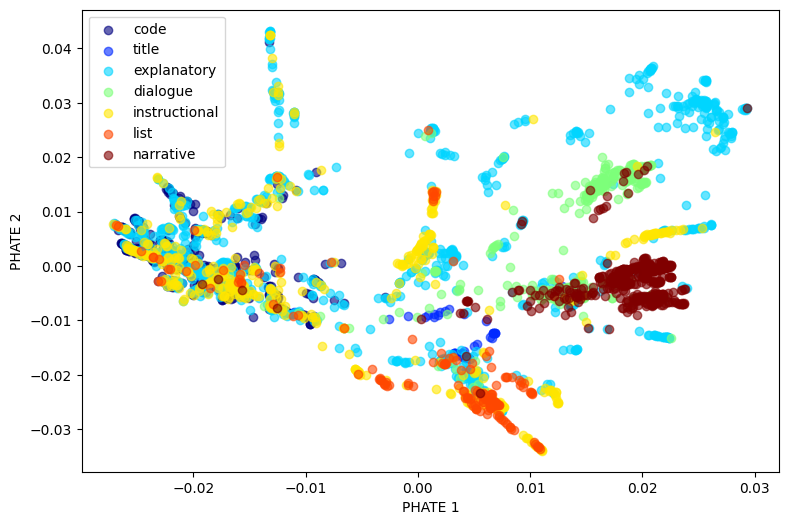

In [31]:

plt.figure(figsize=(9,6))
# Step 4: Plotting the PHATE result with genres in different colors
for label in unique_labels:
    idx = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(data_phate[idx, 0], data_phate[idx, 1], c=[color_map[label]], label=label, alpha=0.6)

plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.legend()
plt.show()

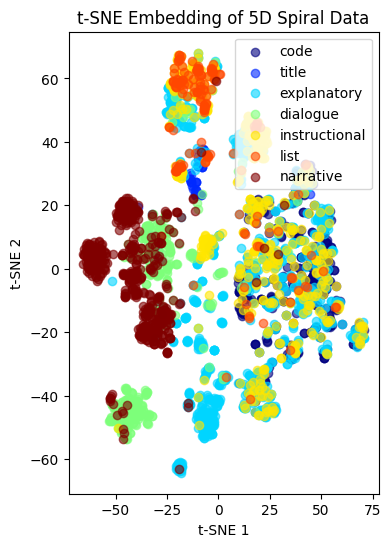

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data to 2D
data_tsne = tsne.fit_transform(data)

plt.figure(figsize=(6,6))
# Fit and transform the data to 2D
for label in unique_labels:
    idx = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(data_tsne[idx, 0], data_tsne[idx, 1], c=[color_map[label]], label=label, alpha=0.6)

# Plotting the t-SNE result
plt.title('t-SNE Embedding of 5D Spiral Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

Calculating PHATE...
  Running PHATE on 2944 observations and 1024 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...


    Calculated PCA in 0.65 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.54 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 2.23 seconds.
  Calculating landmark operator...
    Calculating SVD...


/home/ubuntu/taker/.venv/lib/python3.9/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 17 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated SVD in 0.34 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.67 seconds.
  Calculated landmark operator in 4.96 seconds.
  Calculating optimal t...
    Automatically selected t = 51
  Calculated optimal t in 3.38 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.80 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 107.65 seconds.
Calculated PHATE in 120.04 seconds.


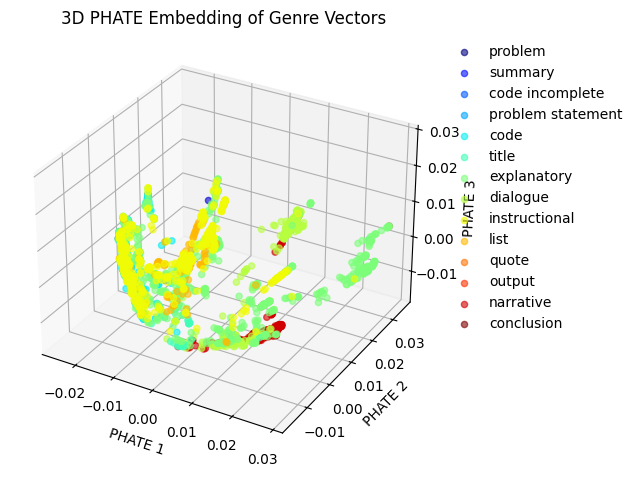

In [5]:
import phate
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Combine all vectors into a single dataset and create a labels list
data = []
labels = []
for genre, vecs in genre_vecs.items():
    data.extend(vecs)
    labels.extend([genre] * len(vecs))

data = np.array(data)  # Convert list of vectors into a numpy array for PHATE

# Assign unique colors to each genre
unique_labels = list(set(labels))
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))
color_map = dict(zip(unique_labels, colors))

# Initialize and fit-transform with PHATE
phate_op = phate.PHATE(n_components=3)  # Ensure PHATE is set to produce a 3-dimensional embedding
data_phate = phate_op.fit_transform(data)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in unique_labels:
    idx = [i for i, l in enumerate(labels) if l == label]
    ax.scatter(data_phate[idx, 0], data_phate[idx, 1], data_phate[idx, 2], c=[color_map[label]], label=label, alpha=0.6)

ax.set_title('3D PHATE Embedding of Genre Vectors')
ax.set_xlabel('PHATE 1')
ax.set_ylabel('PHATE 2')
ax.set_zlabel('PHATE 3')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.tight_layout()
plt.show()


In [6]:

prompt_vecs = defaultdict(list)

for text_obj in tqdm(dataset):
    prompt = text_obj["prompt"]
    for split_text in text_obj["split_text"]:
        vec = split_text["vec"]
        prompt_vecs[prompt].append(vec)

100%|██████████| 598/598 [00:00<00:00, 26394.54it/s]


In [24]:

import phate

# Step 1: Combine all vectors into a single dataset and create a labels list
data = []
labels = []
for genre, vecs in prompt_vecs.items():
    data.extend(vecs)
    labels.extend([genre] * len(vecs))

data = np.array(data)  # Convert list of vectors into a numpy array for PHATE

# Step 2: Assign unique colors to each genre
unique_labels = list(set(labels))
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))
color_map = dict(zip(unique_labels, colors))

# Step 3: Initialize and fit-transform with PHATE
phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(data)

Calculating PHATE...
  Running PHATE on 2944 observations and 1024 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...


    Calculated PCA in 2.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.69 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 3.78 seconds.
  Calculating landmark operator...
    Calculating SVD...


/home/ubuntu/taker/.venv/lib/python3.9/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 17 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated SVD in 1.69 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.92 seconds.
  Calculated landmark operator in 7.70 seconds.
  Calculating optimal t...
    Automatically selected t = 27
  Calculated optimal t in 7.33 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.56 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 6.56 seconds.
Calculated PHATE in 27.96 seconds.


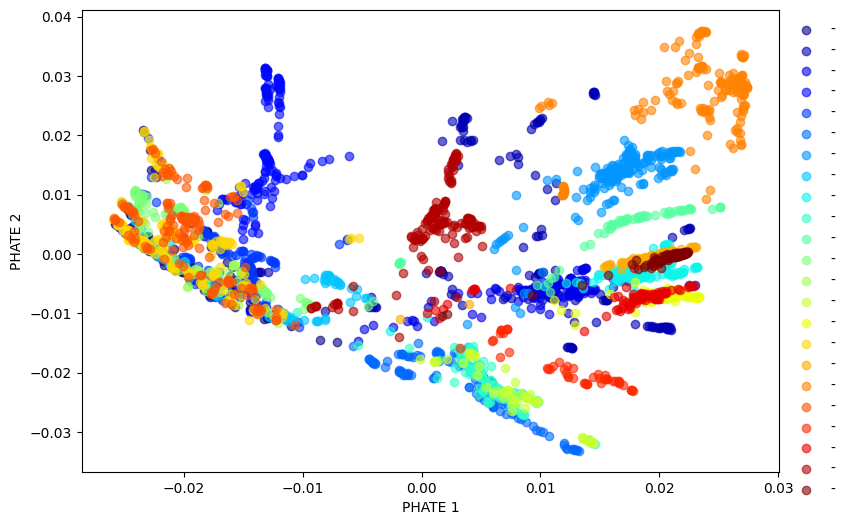

In [28]:

plt.figure(figsize=(9,6))
# Step 4: Plotting the PHATE result with genres in different colors
for label in unique_labels:
    idx = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(data_phate[idx, 0], data_phate[idx, 1], c=[color_map[label]], label="-", alpha=0.6)

#plt.title('PHATE Embedding of Genre Vectors')
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.show()